In [2]:
import pandas as pd
import numpy as np
from mod_my_utils.read_write_data import get_price_csv

In [3]:
folder_path = 'data/'
stock_name = 'AAPL'
index_col = 'Date'

In [4]:
stock_data = get_price_csv(folder_name=folder_path,symbol=stock_name, index_col=index_col)

stock name:  AAPL


In [11]:
data = stock_data[["Adj. Close"]].copy()
data.columns = ["Price"] 
data.head()

,Price
Date,
2007-12-03,22.986003
2007-12-04,23.108091
2007-12-05,23.839335
2007-12-06,24.411582
2007-12-07,24.970258


In [12]:
data['MA50'] = data['Price'].rolling(window=50, min_periods=1).mean()

In [13]:
data['MA250'] = data['Price'].rolling(window=250, min_periods=1).mean()

In [14]:
data.head()

,Price,MA50,MA250
Date,,,
2007-12-03,22.986003,22.986003,22.986003
2007-12-04,23.108091,23.047047,23.047047
2007-12-05,23.839335,23.311143,23.311143
2007-12-06,24.411582,23.586253,23.586253
2007-12-07,24.970258,23.863054,23.863054


In [15]:
data['MACD'] = data['MA50'] - data['MA250']

In [16]:
data.head(110)

,Price,MA50,MA250,MACD
Date,,,,
2007-12-03,22.986003,22.986003,22.986003,0.000000
2007-12-04,23.108091,23.047047,23.047047,0.000000
2007-12-05,23.839335,23.311143,23.311143,0.000000
2007-12-06,24.411582,23.586253,23.586253,0.000000
2007-12-07,24.970258,23.863054,23.863054,0.000000
...,...,...,...,...
2008-05-05,23.740380,18.657731,19.790365,-1.132634
2008-05-06,23.988412,18.829734,19.829599,-0.999865
2008-05-07,23.465360,18.992792,19.863263,-0.870471


<AxesSubplot:xlabel='Date'>

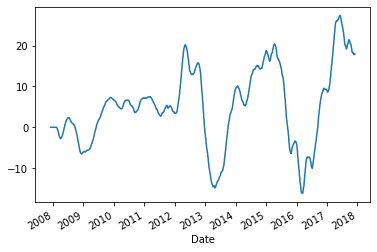

In [27]:
data['MACD'].plot()

<img src='img/macd_signal1.png'>

<img src='img/macd_signal.png'>

if macd > 0:
middle = 1
else:
middle = 0


diff(middle)

In [75]:
df = data.copy()

In [76]:
df['middle'] = np.where(df['MACD'] > 0, 1, 0)

<AxesSubplot: xlabel='Date'>

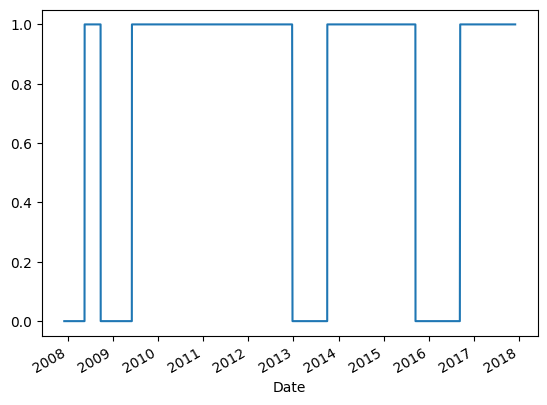

In [77]:
df['middle'].plot()

In [78]:
df['diff_middle'] = df['middle'] - df['middle'].shift(1)

In [79]:
def calc_signal(n):
    if n == -1:
        return 'sell'
    elif n == 1:
        return 'buy'
    else: 
        return 'hold'

In [80]:
df['buy_sell'] = df['diff_middle'].apply(calc_signal)

In [81]:
df.drop(['middle', 'diff_middle'], axis=1, inplace=True)

In [82]:
df

,Price,MA50,MA250,MACD,buy_sell
Date,,,,,
2007-12-03,22.986003,22.986003,22.986003,0.000000,hold
2007-12-04,23.108091,23.047047,23.047047,0.000000,hold
2007-12-05,23.839335,23.311143,23.311143,0.000000,hold
2007-12-06,24.411582,23.586253,23.586253,0.000000,hold
2007-12-07,24.970258,23.863054,23.863054,0.000000,hold
...,...,...,...,...,...
2017-11-27,174.090000,162.113916,144.210697,17.903219,hold
2017-11-28,173.070000,162.377716,144.462209,17.915507,hold
2017-11-29,169.480000,162.593916,144.699796,17.894120,hold
